In [1]:
%pip install git+https://github.com/HakaiInstitute/ocean-data-parser.git

%pip install folium 
%pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/HakaiInstitute/ocean-data-parser.git to /tmp/pip-req-build-115vqbh6
  Running command git clone -q https://github.com/HakaiInstitute/ocean-data-parser.git /tmp/pip-req-build-115vqbh6
  Created wheel for ocean-data-parser: filename=ocean_data_parser-0.1.0-py3-none-any.whl size=42111 sha256=d15df3d587f429752eb3cb52029dee7ef5b5d868dc97e03dc38016af7bb2cee5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4h9jxxdz/wheels/da/13/ab/3935dafef906d730e8b8408501739fcba46984c1d62b638d10
Successfully built ocean-data-parser


In [81]:
from ocean_data_parser.read import nmea
import pandas as pd
from glob import glob
from tqdm import tqdm

import plotly.express as px
import folium

import numpy as np


# Download test data 
NMEA test data is available here:

https://github.com/HakaiInstitute/ocean-data-parser/tree/main/tests/parsers_test_files/nmea

In [2]:
# retrieve raw data


# Read NMEA file

## Parse NMEA to a table format

In [3]:
nmea_files = glob("../tests/parsers_test_files/nmea/seaspan/nmeadata-*.txt")
nmea_parsed = [
    nmea.file(file).to_dataframe()
    for file in tqdm(nmea_files, desc="Import nmea files", unit="file")
]

df = pd.concat(nmea_parsed)
df


Import nmea files: 100%|██████████| 86/86 [00:35<00:00,  2.44file/s]


,row,prefix,talker,sentence_type,subtype,manufacturer,b_pressure_inch,inches,b_pressure_bar,bars,...,heading,hdg_true,wind_angle,reference,wind_speed,wind_speed_units,nmea_type,gps_time,latitude_degrees_north,longitude_degrees_east
index,,,,,,,,,,,,,,,,,,,,,
0,0,20220705 120001+00:00,II,MDA,None,None,29.9,I,1.013,B,...,NaN,None,NaN,None,NaN,None,IIMDA,NaT,NaN,NaN
1,1,20220705 120001+00:00,GP,RMC,None,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,GPRMC,2022-07-05 11:59:56+00:00,49.38400,-123.42983
2,2,20220705 120001+00:00,HC,HDT,None,None,NaN,None,NaN,None,...,22.9,T,NaN,None,NaN,None,HCHDT,NaT,NaN,NaN
3,3,20220705 120001+00:00,WI,MWV,None,None,NaN,None,NaN,None,...,NaN,None,5.30,R,9.68,N,WIMWV,NaT,NaN,NaN
4,4,20220705 120003+00:00,II,MDA,None,None,29.9,I,1.013,B,...,NaN,None,NaN,None,NaN,None,IIMDA,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,7194,20220702 025956+00:00,WI,MWV,None,None,NaN,None,NaN,None,...,NaN,None,68.70,R,1.89,N,WIMWV,NaT,NaN,NaN
7195,7195,20220702 025958+00:00,HC,HDT,None,None,NaN,None,NaN,None,...,272.8,T,NaN,None,NaN,None,HCHDT,NaT,NaN,NaN
7196,7196,20220702 025958+00:00,II,MDA,None,None,29.9,I,1.013,B,...,NaN,None,NaN,None,NaN,None,IIMDA,NaT,NaN,NaN


## Convert prefix of NMEA to datetime

In [4]:
# In this case the each rows prefix prior to the NMEA string is a timestamp, convert it to a datetime object
df["computer_time"] = pd.to_datetime(df["prefix"])


# Reseample NMEA data to 2s

In [5]:
# Use the prefix timestamp as an index and resample the data to a 5 min interval and keep the first good value
df_resampled = df.set_index("computer_time").resample("2s").first()
df_resampled.head()


,row,prefix,talker,sentence_type,subtype,manufacturer,b_pressure_inch,inches,b_pressure_bar,bars,...,heading,hdg_true,wind_angle,reference,wind_speed,wind_speed_units,nmea_type,gps_time,latitude_degrees_north,longitude_degrees_east
computer_time,,,,,,,,,,,,,,,,,,,,,
2022-07-02 00:00:00+00:00,0.0,20220702 000001+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,1.8,T,325.09,R,5.38,N,HCHDT,2022-07-01 23:59:56+00:00,49.31233,-123.10683
2022-07-02 00:00:02+00:00,4.0,20220702 000003+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,1.7,T,354.99,R,6.30,N,HCHDT,2022-07-02 23:59:58+00:00,49.31233,-123.10683
2022-07-02 00:00:04+00:00,8.0,20220702 000005+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,1.7,T,313.59,R,7.48,N,HCHDT,2022-07-02 00:00:00+00:00,49.31233,-123.10683
2022-07-02 00:00:06+00:00,12.0,20220702 000007+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,1.7,T,313.49,R,8.18,N,HCHDT,2022-07-02 00:00:02+00:00,49.31233,-123.10683
2022-07-02 00:00:08+00:00,16.0,20220702 000009+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,1.7,T,288.69,R,4.20,N,HCHDT,2022-07-02 00:00:04+00:00,49.31233,-123.10683


# Plot Resulting Data

<AxesSubplot:xlabel='Time', ylabel='Air Temperature'>

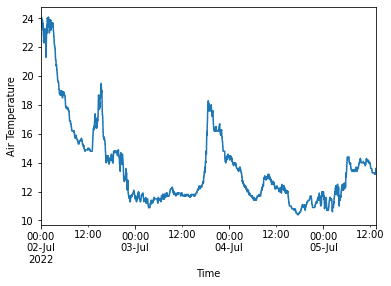

In [6]:
# Plot data
df_resampled["air_temp"].plot(xlabel="Time", ylabel="Air Temperature")


<AxesSubplot:xlabel='Time', ylabel='Baromeric Pressure [bar]'>

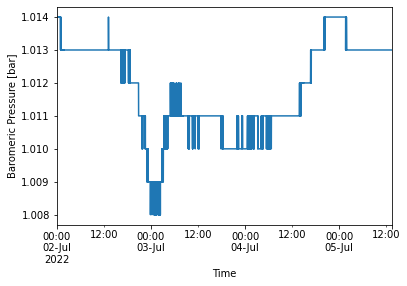

In [7]:
# Plot data
df_resampled["b_pressure_bar"].plot(xlabel="Time", ylabel="Baromeric Pressure [bar]")


<AxesSubplot:xlabel='Time', ylabel='Wind Speed'>

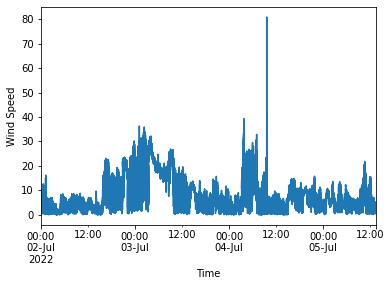

In [8]:
# Plot data
df_resampled["wind_speed"].plot(xlabel="Time", ylabel="Wind Speed")


<AxesSubplot:xlabel='Time', ylabel='Speed Over Ground'>

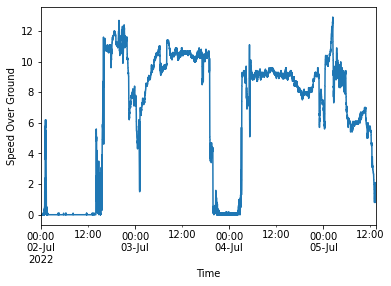

In [9]:
# Plot data
df_resampled["spd_over_grnd"].plot(xlabel="Time", ylabel="Speed Over Ground")


# Plot position on a map

In [10]:
# Plot lat/lon on a map
lat, lon = "latitude_degrees_north", "longitude_degrees_east"
map = folium.Map(location=df_resampled[[lat, lon]].mean(), zoom_start=9)
folium.PolyLine(df_resampled[[lat, lon]].dropna().values, color="red").add_to(map)
map


# Review Boat Heading vs True Course Data

<AxesSubplot:ylabel='Frequency'>

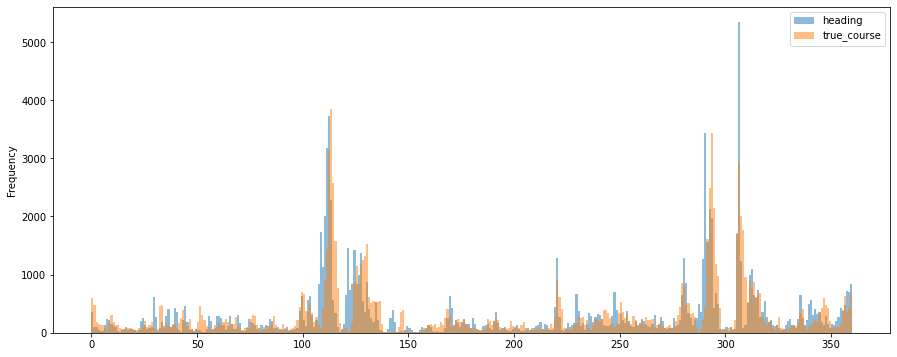

In [83]:
# Let's consider only data when the boat is moving and there's wind measured
df_review = df_resampled.query(
    "spd_over_grnd>2 and wind_speed>1 and gps_time>'2022-07-02T12:00:00Z'"
)

df_review[["heading", "true_course"]].astype(float).plot.hist(
    stacked=False, alpha=0.5, bins=360, figsize=(15, 6)
)


<AxesSubplot:xlabel='computer_time'>

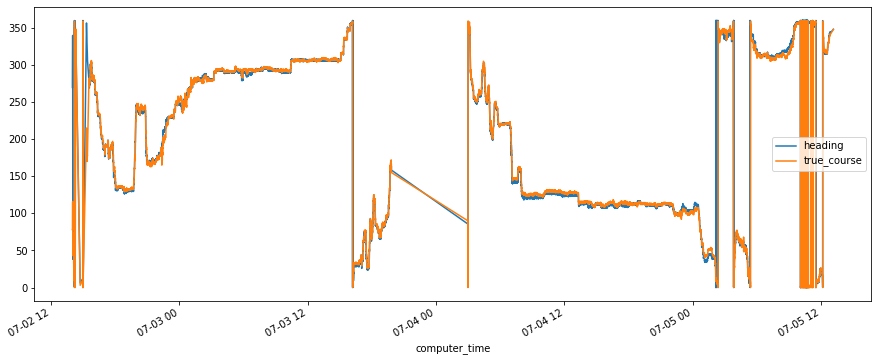

In [80]:
df_review[["heading", "true_course"]].plot(figsize=(15, 6))


<AxesSubplot:ylabel='Frequency'>

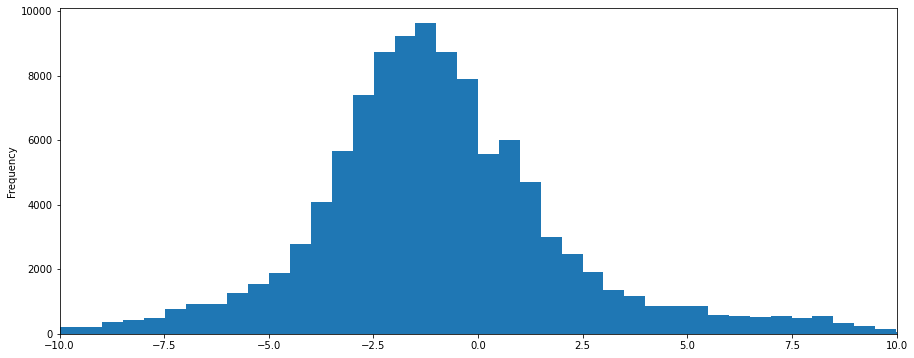

In [92]:
# Compute the difference between the boat heading vs the true_course angle
(df_review["heading"] - df_review["true_course"]).plot.hist(
    bins=1440, figsize=(15, 6), xlim=[-10, 10]
)


# Review Wind Data

The wind_angle data is refering to the airmar orientation. We need to apply the following transformations:
1. Define the angle difference between the AIRMAR 0 deg direction, vs the boat heading data. Should be a constant offset
2. Transform the AIRMAR wind data to the earth reference frame (EARTH COORDINATES)
3. Substract the boat motion from the wind data in EARTH COORDINATES


<AxesSubplot:title={'center':'Wind Direction Relative to Airmar'}, ylabel='Frequency'>

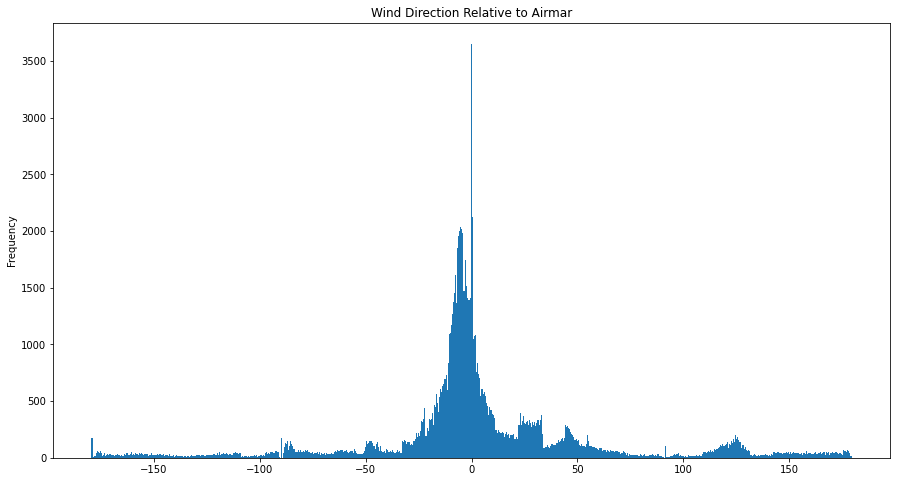

In [79]:
# Review the wind direction when the ship is moving faster than 2 (m/s?)
df_review["wind_angle"].apply(lambda x: x if x < 180 else x - 360).plot.hist(
    bins=720,
    figsize=(15, 8),
    xlabel="Wind Angle",
    title="Wind Direction Relative to Airmar",
)


<AxesSubplot:title={'center':'Wind Speed Relative to Airmar'}, ylabel='Frequency'>

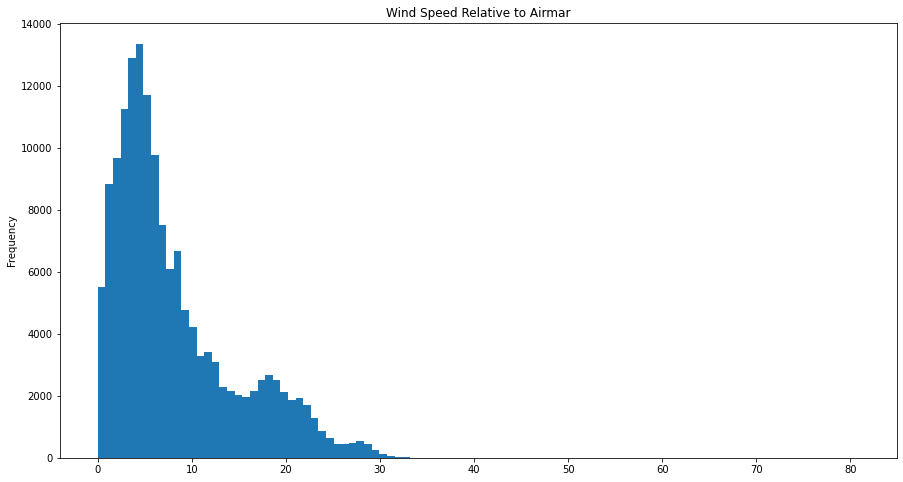

In [69]:
df_resampled["wind_speed"].plot.hist(
    bins=100,
    figsize=(15, 8),
    xlabel="Wind Speed",
    title="Wind Speed Relative to Airmar",
)


In [128]:
AIRMAR_HEADING_OFFSET_CORRECTION = 8


def spddir_to_uv(spd, dir, convention="going_to"):
    return spd * np.cos(dir / 180 * np.pi), spd * np.sin(dir / 180 * np.pi)


def uv_to_spddir(u, v, convention="going_to"):
    return np.sqrt(u**2 + v**2), np.arctan2(v, u) / np.pi * 180


def instruments_to_earth_coordinates(speed_inst, dir_inst, platform_inst, platform_dir):

    # Convert both speed,directions data to u,v components
    u_inst, v_inst = spddir_to_uv(speed_inst, dir_inst)
    u_platform, v_platform = spddir_to_uv(platform_inst, platform_dir)

    # Substract the platform speed from the measurement
    u, v = u_inst - u_platform, v_inst - v_platform

    # Convert to speed direction
    return uv_to_spddir(u, v)


## Substract boat component from the AIRMAR wind data

In [135]:
(
    df_resampled["wind_speed_earth"],
    df_resampled["wind_dir_earth"],
) = instruments_to_earth_coordinates(
    df_resampled["wind_speed"],
    df_resampled["wind_angle"] + 180 + AIRMAR_HEADING_OFFSET_CORRECTION,
    df_resampled["spd_over_grnd"],
    df_resampled["true_course"],
)


<AxesSubplot:xlabel='computer_time'>

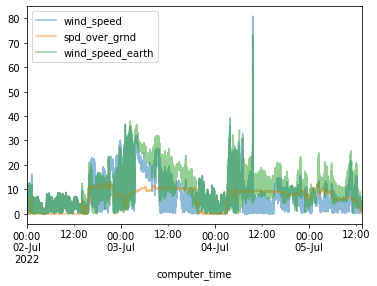

In [157]:
df_resampled[["wind_speed", "spd_over_grnd", "wind_speed_earth"]].plot(alpha=0.5)


<AxesSubplot:xlabel='computer_time', ylabel='wind_speed_earth'>

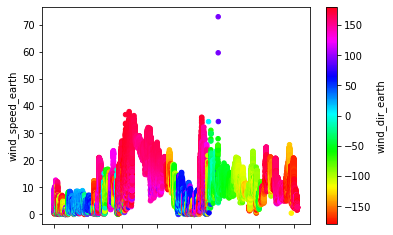

In [141]:
df_resampled.reset_index().plot.scatter(
    x="computer_time", y="wind_speed_earth", c="wind_dir_earth", colormap="hsv"
)


<AxesSubplot:xlabel='computer_time', ylabel='spd_over_grnd'>

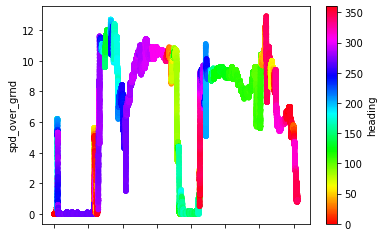

In [156]:
df_resampled.reset_index().plot.scatter(
    x="computer_time", y="spd_over_grnd", c="heading", colormap="hsv"
)


<AxesSubplot:xlabel='computer_time', ylabel='spd_over_grnd'>

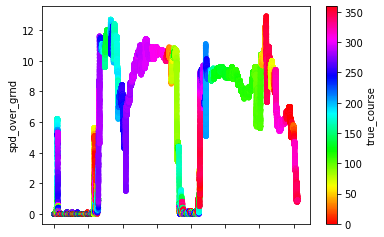

In [142]:
df_resampled.reset_index().plot.scatter(
    x="computer_time", y="spd_over_grnd", c="true_course", colormap="hsv"
)


In [145]:
import matplotlib.pyplot as plt

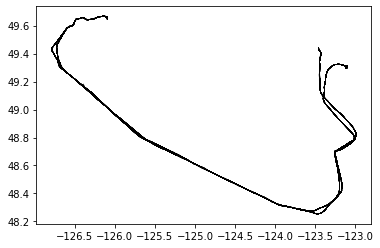

In [151]:
u,v = spddir_to_uv(df_resampled['wind_speed_earth'],df_resampled['wind_dir_earth'])
plt.quiver(df_resampled['longitude_degrees_east'],df_resampled['latitude_degrees_north'],u,v)